In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Lemalabs/Data/'
data = pd.read_csv(path + "online_shoppers_intention.csv")

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.shape

(12330, 18)

In [ ]:
from sklearn.preprocessing import LabelEncoder

month_labelencoder = LabelEncoder()
data["Month"] = month_labelencoder.fit_transform(data["Month"])

visitor_labelencoder = LabelEncoder()
data["VisitorType"] = visitor_labelencoder.fit_transform(data["VisitorType"])

weekend_labelencoder = LabelEncoder()
data["Weekend"] = weekend_labelencoder.fit_transform(data["Weekend"])

revenue_labelencoder = LabelEncoder()
data["Revenue"] = revenue_labelencoder.fit_transform(data["Revenue"])

In [ ]:
xcol = data.drop(columns = ["Revenue"])
ycol = data["Revenue"]

In [ ]:
x = np.array(xcol)
y = np.array(ycol)
y = np.reshape(y, (-1,1))
x.shape , y.shape

((12330, 17), (12330, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state = 1, shuffle = True)
fold.get_n_splits(x_train,y_train)

5

In [ ]:
val =list(np.arange(0.01,10,1))
val

NameError: ignored

In [ ]:
parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

model = LogisticRegression(penalty = 'l2', n_jobs=-2, max_iter = 10000)
log_reg = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.01, 0.11, 0.21000000000000002,
                               0.31000000000000005, 0.41000000000000003, 0.51,
                               0.6100000000000001, 0.7100000000000001, 0.81,
                               0.91],
                         's

In [ ]:
print(log_reg.best_params_)

{'C': 0.7100000000000001, 'solver': 'liblinear'}


In [ ]:
log_reg_train_pred = log_reg.predict(x_train)
log_reg_test_pred = log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,log_reg_test_pred))
ac = accuracy_score(y_test, log_reg_test_pred)
print('test_accuarcy = {} %'.format(ac*100))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2639
           1       0.69      0.38      0.49       444

    accuracy                           0.89      3083
   macro avg       0.79      0.67      0.71      3083
weighted avg       0.87      0.89      0.87      3083

test_accuarcy = 88.55011352578657 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(fbeta_score, beta=1, pos_label = 1)

params = {'n_neighbors':[1, 100, 10, 5, 6]}

KNN = KNeighborsClassifier(algorithm='brute')
Knn_grid = GridSearchCV(KNN, params, n_jobs= -2, cv=fold, scoring=f_scorer, verbose=True)

Knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_sele

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': [1, 100, 10, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1, pos_label=1),
             verbose=True)

In [ ]:
print(Knn_grid.best_params_)

{'n_neighbors': 1}


In [ ]:
yt_pred_knn = Knn_grid.predict(x_test)

print(classification_report(y_test, yt_pred_knn ))

ac2= accuracy_score(y_test, yt_pred_knn)
print('test_accuracy = {} % '.format(ac2 * 100))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2639
           1       0.42      0.42      0.42       444

    accuracy                           0.83      3083
   macro avg       0.66      0.66      0.66      3083
weighted avg       0.83      0.83      0.83      3083

test_accuracy = 83.39279922153746 % 


In [ ]:
from sklearn.naive_bayes import ComplementNB
NB_comp = ComplementNB()
NB_comp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
y_pred_NB_comp= NB_comp.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB_comp))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2639
           1       0.55      0.62      0.59       444

    accuracy                           0.87      3083
   macro avg       0.74      0.77      0.76      3083
weighted avg       0.88      0.87      0.88      3083



In [ ]:
ac3= accuracy_score(y_test, y_pred_NB_comp)
print('test_accuracy = {} % '.format(ac3 * 100))

test_accuracy = 87.34998378203049 % 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtree= dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))
ac4= accuracy_score(y_test, y_pred_dtree)
print('test_accuracy = {} % '.format(ac4 * 100))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2639
           1       0.53      0.58      0.55       444

    accuracy                           0.86      3083
   macro avg       0.73      0.75      0.74      3083
weighted avg       0.87      0.86      0.87      3083

test_accuracy = 86.44177748945832 % 


In [ ]:
prune_path = dtree.cost_complexity_pruning_path(x_train, y_train)
alphas = prune_path.ccp_alphas
impurities = prune_path.impurities

new_dTrees = []
i=0

for alpha in alphas:
    new_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_dTree.fit(x_train, y_train)
    
    new_dTrees.append(new_dTree)

In [ ]:
test_scores = [new_dTree.score(x_test, y_test) for new_dTree in new_dTrees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])

pruned_dTree.fit(x_train, y_train)

max f1 test_score = 0.9013947453778787
position of max f1 = 326


DecisionTreeClassifier(ccp_alpha=0.000785286028429066, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
ytpred_dTree = pruned_dTree.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, ytpred_dTree))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2639
           1       0.72      0.52      0.60       444

    accuracy                           0.90      3083
   macro avg       0.82      0.74      0.77      3083
weighted avg       0.89      0.90      0.89      3083



In [ ]:
ac5= accuracy_score(y_test, ytpred_dTree)
print('test_accuracy = {} % '.format(ac5 * 100))

test_accuracy = 90.13947453778786 % 


In [ ]:
logreg_probs = log_reg.predict_proba(x_test)
Knn_grid_probs = Knn_grid.predict_proba(x_test)
NB_comp_probs = NB_comp.predict_log_proba(x_test)
Dtree_probs = pruned_dTree.predict_proba(x_test)

In [ ]:
# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
Knn_grid_probs = Knn_grid_probs[:, 1]
NB_comp_probs = NB_comp_probs[:, 1]
Dtree_probs = Dtree_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

# calculate scores
logreg_auc = roc_auc_score(y_test, logreg_probs)
Knn_grid_auc = roc_auc_score(y_test, Knn_grid_probs)
NB_comp_auc = roc_auc_score(y_test, NB_comp_probs)
Dtree_auc = roc_auc_score(y_test, Dtree_probs)

print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))
print('NB: ROC AUC= {} %'.format(round(NB_comp_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 87.9 %
KNN: ROC AUC= 66.10000000000001 %
NB: ROC AUC= 76.2 %
DTree: ROC AUC= 90.4 %


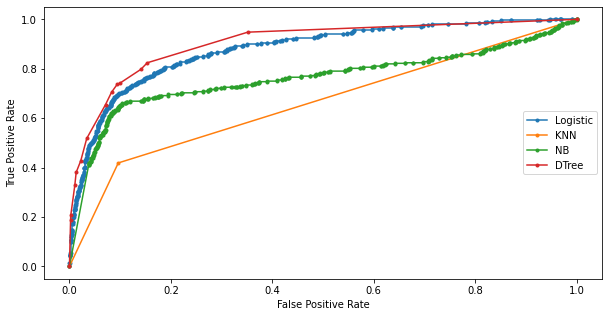

In [ ]:
from sklearn.metrics import roc_curve

#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_test, logreg_probs)
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(y_test, Knn_grid_probs)
NB_fpr, NB_tpr, NB_thres = roc_curve(y_test, NB_comp_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(y_test, Dtree_probs)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2639
           1       0.73      0.59      0.65       444

    accuracy                           0.91      3083
   macro avg       0.83      0.78      0.80      3083
weighted avg       0.90      0.91      0.91      3083



In [ ]:
ac6= accuracy_score(y_test, y_pred_rf)
print('test_accuracy = {} % '.format(ac6 * 100))

test_accuracy = 90.9179370742783 % 


In [ ]:
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test,rf_probs)

print('Random Forest: ROC AUC = {}%'.format(round(rf_auc,3)*100))

Random Forest: ROC AUC = 92.0%


In [ ]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_test, rf_probs)

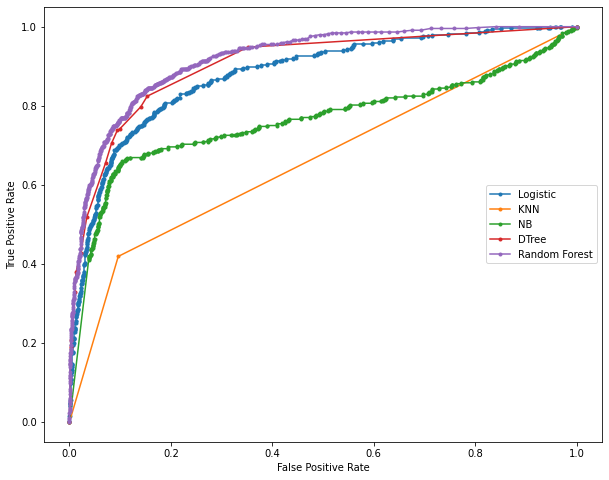

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

xtrain, x_train_lr,ytrain, y_train_lr = train_test_split(x_train, y_train, test_size = 0.60, shuffle = True)

rf = RandomForestClassifier(n_estimators=1000)

rf.fit(xtrain, ytrain)
rf_enc = OneHotEncoder()

rf_enc.fit(rf.apply(xtrain))

rf_enc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
f = rf_enc.transform(rf.apply(x_train_lr))
f.shape, x_train_lr.shape

((5549, 316303), (5549, 17))

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
fold.get_n_splits(x_train_lr, y_train_lr)

parameters = { 'solver':('liblinear','sag'), 'C':[0.001]}

model = LogisticRegression(penalty = 'l2', n_jobs =-2, max_iter=10000)
rf_lr = GridSearchCV(model, parameters,n_jobs = -2, cv = fold)

rf_lr.fit(rf_enc.transform(rf.apply(x_train_lr)), y_train_lr)

print(rf_lr.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.001, 'solver': 'liblinear'}


In [ ]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(x_test)))
yprobs_rf_lr = yprobs_rf_lr[:,1]

In [ ]:
rf_lr_auc = roc_auc_score(y_test, yprobs_rf_lr)

print('Logistic and Random Forest: ROC AUC = {}%'.format(round(rf_lr_auc,3)*100))

Logistic and Random Forest: ROC AUC = 92.5%


In [ ]:
fpr_rf_lr,tpr_rf_lr, thres_rf_lr = roc_curve(y_test, yprobs_rf_lr)

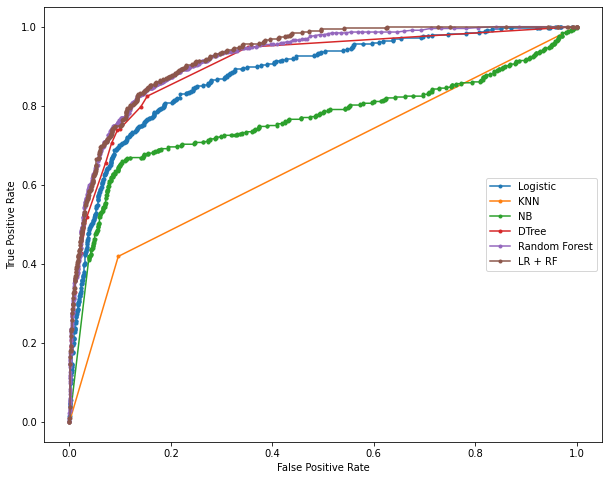

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(NB_fpr, NB_tpr, marker='.', label='NB')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker = '.',label = 'LR + RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=5)
# show the plot
plt.show()